In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


In [2]:
df = pd.read_csv("Medicalpremium.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

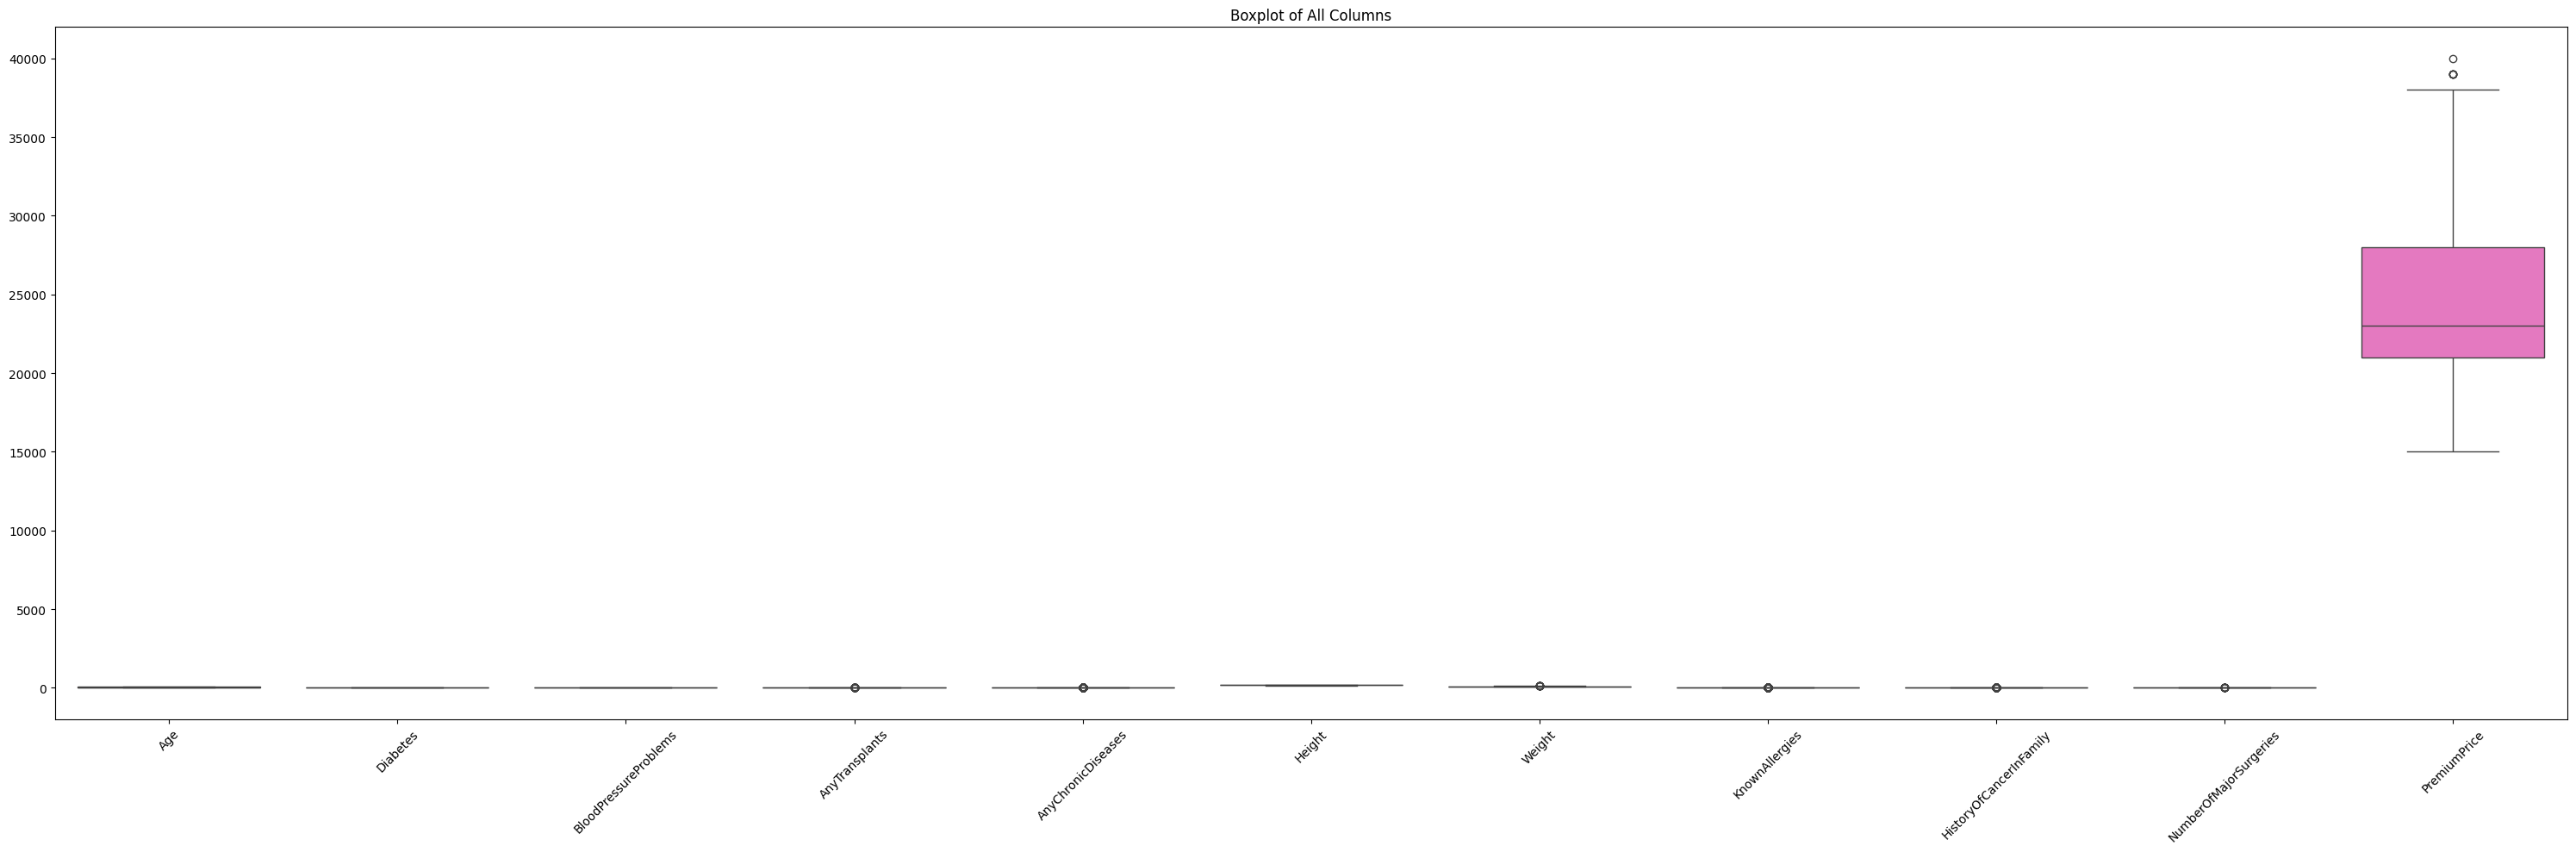

In [4]:
plt.figure(figsize=(30, 10)) 
sns.boxplot(data=df)

plt.xticks(rotation=45) 
plt.title("Boxplot of All Columns")

plt.tight_layout()
plt.show()

In [5]:
X = df2.drop('PremiumPrice',axis=1)
y = df2['PremiumPrice']

NameError: name 'df2' is not defined

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor())
])

In [45]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [46]:
y_pred = pipeline.predict(X_test)


In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_test, y_pred)
print('Mean absolute error :',mae)
print('Mean squared error :',r2)
print('R^2 :', r2)

Mean absolute error : 760.5806451612904
Mean squared error : 0.8263360584888532
R^2 : 0.8263360584888532


In [48]:
param_grid = {
   'model__n_estimators': [50, 100, 200], 
    'model__max_depth': [None, 10, 20],  # Maximum depth of the trees
    'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'model__min_samples_leaf': [1, 2, 4]  # Minimum number of sample
    
}

In [49]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#get the best pamameter and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#predict on the test data
y_pred_2 = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Best Model Mean Squared Error:", mse)
print("Mean absolute error :",mae)
print("r2 :",r2)
print("Best Model Hyperparameters:", best_params)

Best Model Mean Squared Error: 4755880.763095961
Mean absolute error : 752.9810833983312
r2 : 0.8288357126948848
Best Model Hyperparameters: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 50}


In [41]:
df2 = df.copy()
z=np.abs(stats.zscore(df2['Age']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['Diabetes']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['BloodPressureProblems']))
print(np.where(z>3))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['AnyTransplants']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['AnyChronicDiseases']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['Height']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['Weight']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['KnownAllergies']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['HistoryOfCancerInFamily']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['NumberOfMajorSurgeries']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

z=np.abs(stats.zscore(df2['PremiumPrice']))
print(np.where(z>2.2))
df2.drop(df2.index[np.where(z > 2.2)[0]], inplace=True)

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 14,  26,  39,  73,  79,  86, 101, 125, 139, 147, 169, 173, 187,
       218, 289, 294, 314, 318, 369, 395, 396, 438, 439, 453, 459, 464,
       504, 528, 571, 621, 624, 666, 670, 683, 708, 715, 740, 746, 788,
       801, 804, 817, 841, 863, 865, 906, 915, 922, 927, 932, 938, 951,
       952, 978, 980]),)
(array([], dtype=int64),)
(array([724, 754, 767, 794, 800, 874, 903]),)
(array([141, 144, 145, 148, 150, 163, 171, 174, 178, 179, 182, 183, 190,
       191, 193, 194, 196, 200, 204, 207, 211, 213, 214]),)
(array([], dtype=int64),)
(array([ 23,  36,  39,  64,  80,  81,  82,  84,  86,  94,  95, 105, 112,
       119, 122, 131, 146, 156, 171, 186, 187, 193, 200, 204, 235, 240,
       247, 257, 258, 262, 264, 288, 291, 297, 301, 305, 319, 328, 345,
       358, 361, 372, 376, 380, 383, 391, 392, 401, 403, 404, 405, 409,
       419, 420, 427, 428, 429, 434, 445, 468, 472, 494, 517, 532, 534,
       560, 561,

In [24]:
df2.reset_index(drop=True, inplace=True)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      773 non-null    int64
 1   Diabetes                 773 non-null    int64
 2   BloodPressureProblems    773 non-null    int64
 3   AnyTransplants           773 non-null    int64
 4   AnyChronicDiseases       773 non-null    int64
 5   Height                   773 non-null    int64
 6   Weight                   773 non-null    int64
 7   KnownAllergies           773 non-null    int64
 8   HistoryOfCancerInFamily  773 non-null    int64
 9   NumberOfMajorSurgeries   773 non-null    int64
 10  PremiumPrice             773 non-null    int64
dtypes: int64(11)
memory usage: 66.6 KB


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [25]:
X=df2.drop("PremiumPrice",axis=1)
y=df2["PremiumPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 9875215.497173684
R^2 Score : 0.6445907063788896
Model Score : 0.6445907063788896


In [27]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_score = rf_model.score(X_test, y_test)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")
print(f"Model Score : {model_score}")

Mean Squared Error : 4862127.096774193
R^2 Score : 0.82501190404856
Model Score : 0.82501190404856


In [60]:
pred = rf_model.predict([[23,0,1,0,0,156,79,0,0,0]])
print(pred)

[33960.]


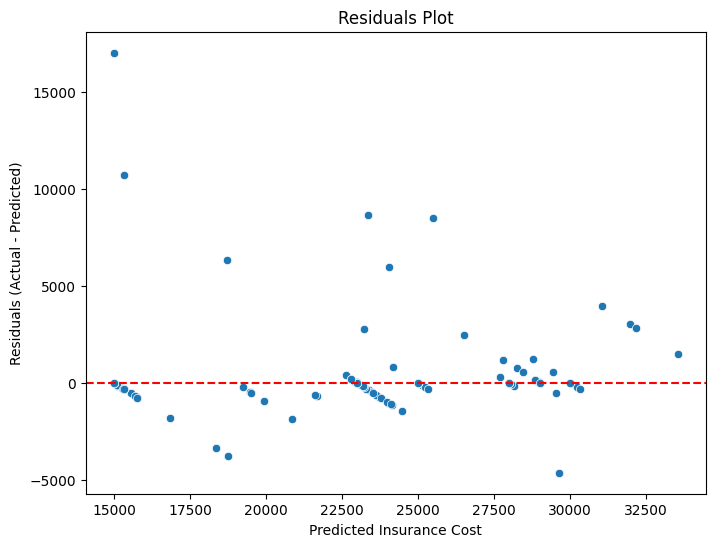

In [50]:
# Residuals
residuals = np.array(y_test) - np.array(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Predicted Insurance Cost')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')

# Show plot
plt.show()